In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
bulk = pd.read_csv('human_bulk_aggregated.csv')
bulk = bulk.set_index('gene')
scel = pd.read_csv('agg_data.csv')
scel = scel.set_index('Unnamed: 0')
scel.index.name = 'gene'

bulk = bulk.loc[list(scel.index)]

d = {}
for i in bulk.index:
    if i not in d:
        d[i] = 1
    else:
        d[i] += 1
drop = []
for g, c in d.items():
    if c>1:
        drop.append(g)
        
scel = scel.drop(drop,axis=0)
bulk = bulk.drop(drop,axis=0)

bulk = bulk[bulk.columns[[0,2,3,5,7,9,11,13]]]


norm = lambda x: (x-x.min())/(x.max()-x.min())
dist = lambda x, y: np.linalg.norm(x-y) 

for col in bulk.columns:
    bulk[col] = norm(bulk[col])
for col in scel.columns:
    scel[col] = norm(scel[col])

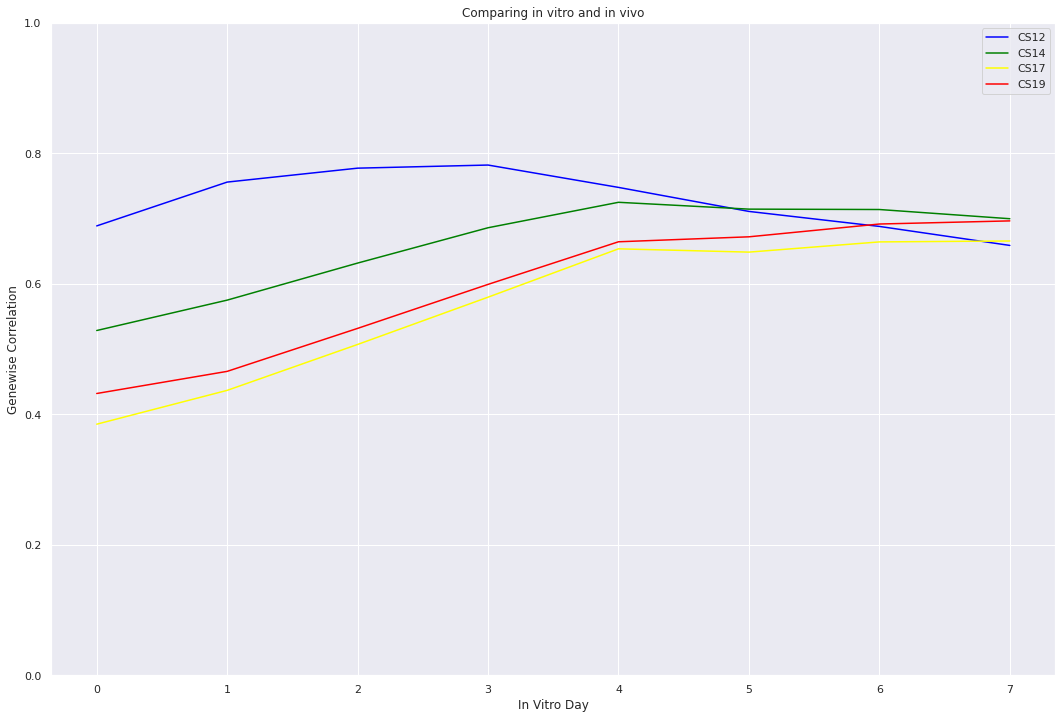

In [228]:
sns.set()
plt.figure(figsize=(18,12))
# axes = fig.subplots(2,2)
# axes = axes.flatten()

cols = ['blue','green','yellow','red']
allcorrs = []
for i, ti in enumerate(scel.columns):
    sc = scel[ti]
    corrs = []
    for j, tj in enumerate(bulk.columns):
        bk = bulk[tj]
        corrs.append(scipy.stats.spearmanr(sc, bk)[0])
    allcorrs.append(corrs)
    plt.plot(np.arange(len(corrs)),np.array(corrs), label=ti, color=cols[i])
    plt.xlabel('In Vitro Day')
    plt.ylabel('Genewise Correlation')
plt.legend()
plt.title("Comparing in vitro and in vivo")
plt.ylim((0,1))
plt.show()

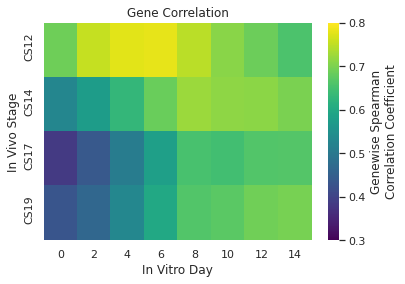

In [229]:
sns.heatmap(np.array(allcorrs),annot=False, cmap='viridis', vmin=0.3, vmax=0.8, cbar_kws={'label':'Genewise Spearman\nCorrelation Coefficient'})
plt.yticks(ticks=[0.25,1.25,2.25,3.25],labels=scel.columns)
plt.xticks(ticks=0.5+np.arange(len([a.replace('t_','') for a in bulk.columns])),labels=[a.replace('t_','') for a in bulk.columns])
plt.ylabel('In Vivo Stage')
plt.xlabel('In Vitro Day')
plt.title("Gene Correlation")
plt.savefig("11_bulk_correlation_comparison_halfdays.pdf", dpi=300)
plt.show()

In [230]:
bulk = pd.read_csv('human_bulk_aggregated.csv')
bulk = bulk.set_index('gene')
scel = pd.read_csv('agg_data.csv')
scel = scel.set_index('Unnamed: 0')
scel.index.name = 'gene'

bulk = bulk.loc[list(scel.index)]

d = {}
for i in bulk.index:
    if i not in d:
        d[i] = 1
    else:
        d[i] += 1
drop = []
for g, c in d.items():
    if c>1:
        drop.append(g)
        
scel = scel.drop(drop,axis=0)
bulk = bulk.drop(drop,axis=0)

norm = lambda x: (x-x.min())/(x.max()-x.min())
dist = lambda x, y: np.linalg.norm(x-y) 

for col in bulk.columns:
    bulk[col] = norm(bulk[col])
for col in scel.columns:
    scel[col] = norm(scel[col])

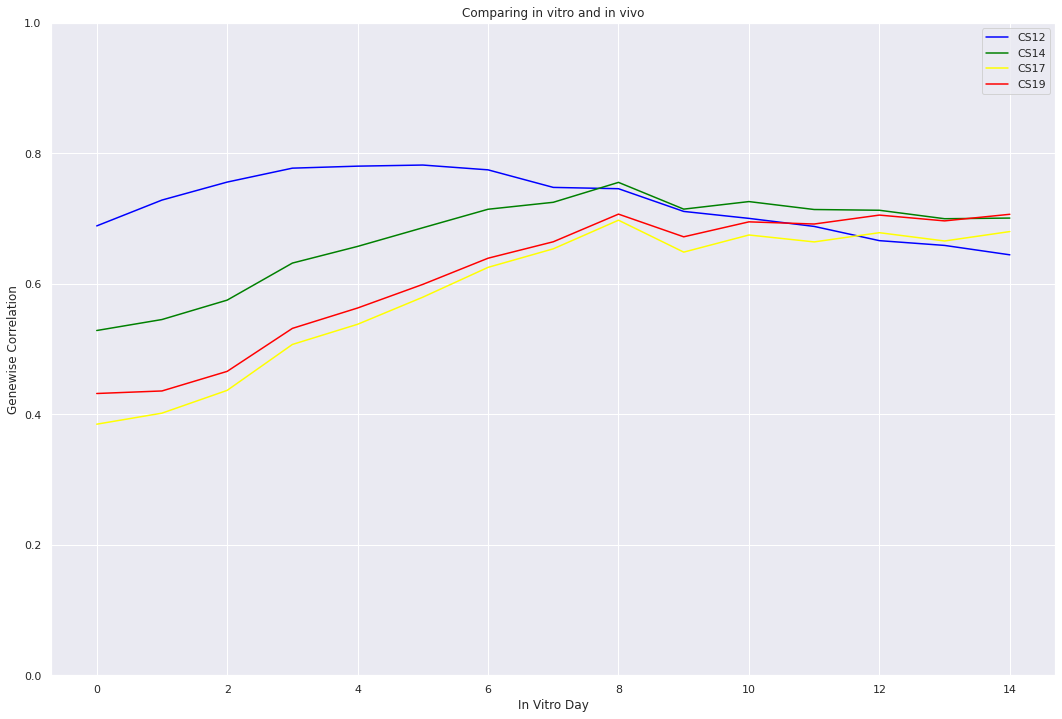

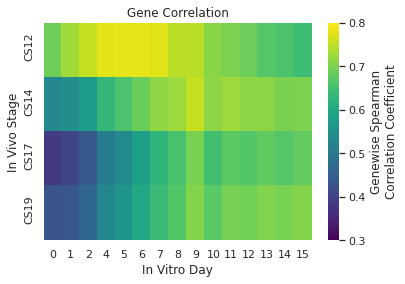

In [232]:
    
sns.set()
plt.figure(figsize=(18,12))
# axes = fig.subplots(2,2)
# axes = axes.flatten()

cols = ['blue','green','yellow','red']
allcorrs = []
for i, ti in enumerate(scel.columns):
    sc = scel[ti]
    corrs = []
    for j, tj in enumerate(bulk.columns):
        bk = bulk[tj]
        corrs.append(scipy.stats.spearmanr(sc, bk)[0])
    allcorrs.append(corrs)
    plt.plot(np.arange(len(corrs)),np.array(corrs), label=ti, color=cols[i])
    plt.xlabel('In Vitro Day')
    plt.ylabel('Genewise Correlation')
plt.legend()
plt.title("Comparing in vitro and in vivo")
plt.ylim((0,1))
plt.show()

sns.heatmap(np.array(allcorrs),annot=False, cmap='viridis', vmin=0.3, vmax=0.8, cbar_kws={'label':'Genewise Spearman\nCorrelation Coefficient'})
plt.yticks(ticks=[0.25,1.25,2.25,3.25],labels=scel.columns)
plt.xticks(ticks=0.5+np.arange(len([a.replace('t_','') for a in bulk.columns])),labels=[a.replace('t_','') for a in bulk.columns])
plt.ylabel('In Vivo Stage')
plt.xlabel('In Vitro Day')
plt.title("Gene Correlation")
plt.savefig("11_bulk_correlation_comparison_alldays.pdf", dpi=300)
plt.show()